In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')



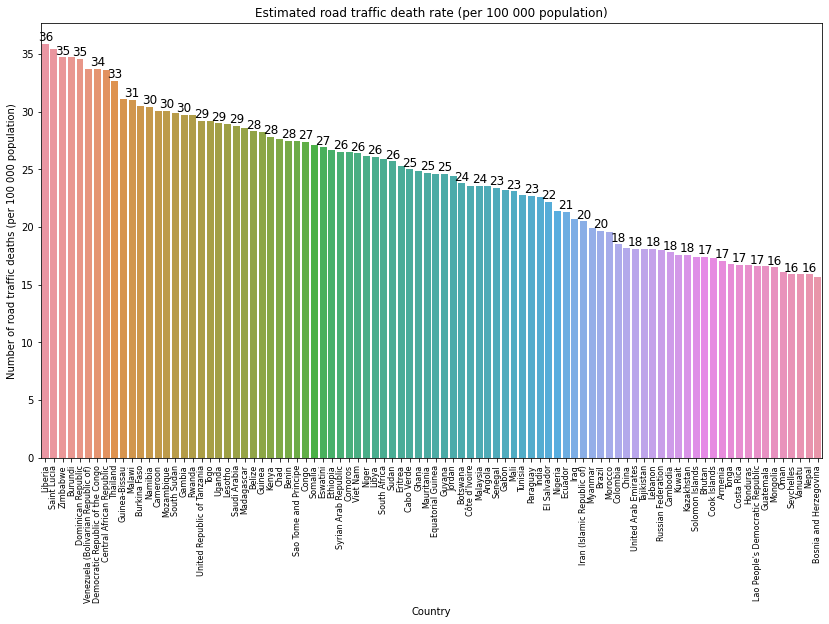

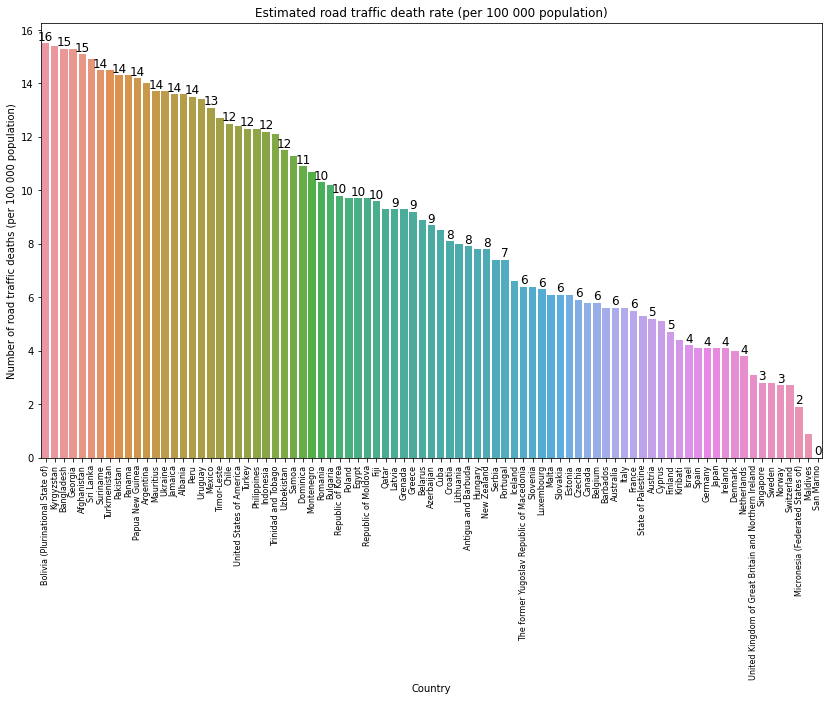

In [44]:
traffic=pd.read_csv('C:\\Users\\user\\Desktop\\dataset\\roadTrafficDeaths.csv')
traffic_sort = traffic.sort_values(by='First Tooltip', 
                                       ascending=False)
for df in traffic_sort[:90].reset_index(drop=True), traffic_sort[90:].reset_index(drop=True):
    fig, ax = plt.subplots(1, 1, figsize=(14, 8))
    bars = sns.barplot(df['Location'], df['First Tooltip'])

    for index in range(0, len(bars.patches), 2):
        bar = bars.patches[index]
        bars.annotate(format(bar.get_height(), '.0f'), (bar.get_x()+bar.get_width()/2., 
                                        bar.get_height()), ha='center', va='bottom', size=12)

    plt.xticks(size=8, rotation=90)
    plt.title(traffic['Indicator'][0])
    plt.xlabel('Country')
    plt.ylabel('Number of road traffic deaths (per 100 000 population)')
    plt.show()

In [45]:
traffic.head(10)

,Location,Indicator,Period,First Tooltip
0,Afghanistan,Estimated road traffic death rate (per 100 000...,2016,15.1
1,Albania,Estimated road traffic death rate (per 100 000...,2016,13.6
2,Angola,Estimated road traffic death rate (per 100 000...,2016,23.6
3,Antigua and Barbuda,Estimated road traffic death rate (per 100 000...,2016,7.9
4,Argentina,Estimated road traffic death rate (per 100 000...,2016,14.0
5,Armenia,Estimated road traffic death rate (per 100 000...,2016,17.1
6,Australia,Estimated road traffic death rate (per 100 000...,2016,5.6
7,Austria,Estimated road traffic death rate (per 100 000...,2016,5.2
8,Azerbaijan,Estimated road traffic death rate (per 100 000...,2016,8.7
9,Bangladesh,Estimated road traffic death rate (per 100 000...,2016,15.3


In [22]:
allCountries = traffic['Location'].unique().tolist()

In [27]:
def autoLabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2, height, '%d'%int(height), ha='center', va = 'bottom')

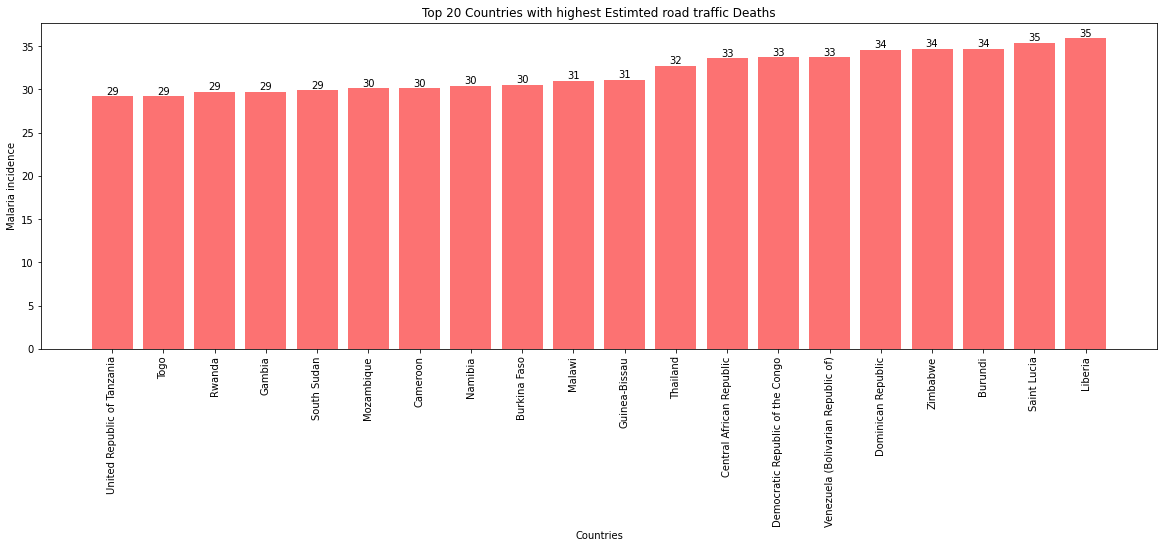

In [30]:
tempData = traffic[traffic['Period'] == 2016]
tempData.sort_values('First Tooltip', inplace=True)
tempDataBot = tempData[-20:]
fig = plt.figure(figsize=(20,6))
ax = plt.subplot2grid((1,1),(0,0))
rects = ax.bar(tempDataBot['Location'], tempDataBot['First Tooltip'], color = "#fc7272")
for tick in ax.get_xticklabels():
    tick.set_rotation(90)
autoLabel(rects)
plt.xlabel("Countries")
plt.ylabel("Malaria incidence")
plt.title("Top 20 Countries with highest Estimted road traffic Deaths")
plt.show()

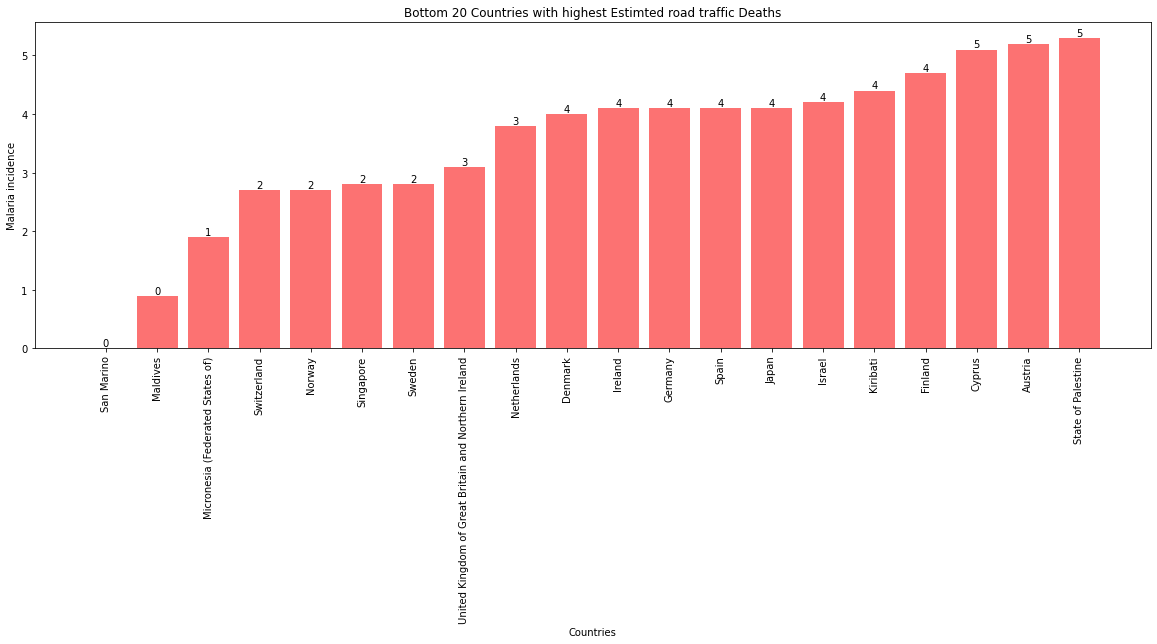

In [31]:
tempData = traffic[traffic['Period'] == 2016]
tempData.sort_values('First Tooltip', inplace=True)
tempDataBot = tempData[:20]
fig = plt.figure(figsize=(20,6))
ax = plt.subplot2grid((1,1),(0,0))
rects = ax.bar(tempDataBot['Location'], tempDataBot['First Tooltip'], color = "#fc7272")
for tick in ax.get_xticklabels():
    tick.set_rotation(90)
autoLabel(rects)
plt.xlabel("Countries")
plt.ylabel("Malaria incidence")
plt.title("Bottom 20 Countries with highest Estimted road traffic Deaths")
plt.show()

Air Pollution Death Rate


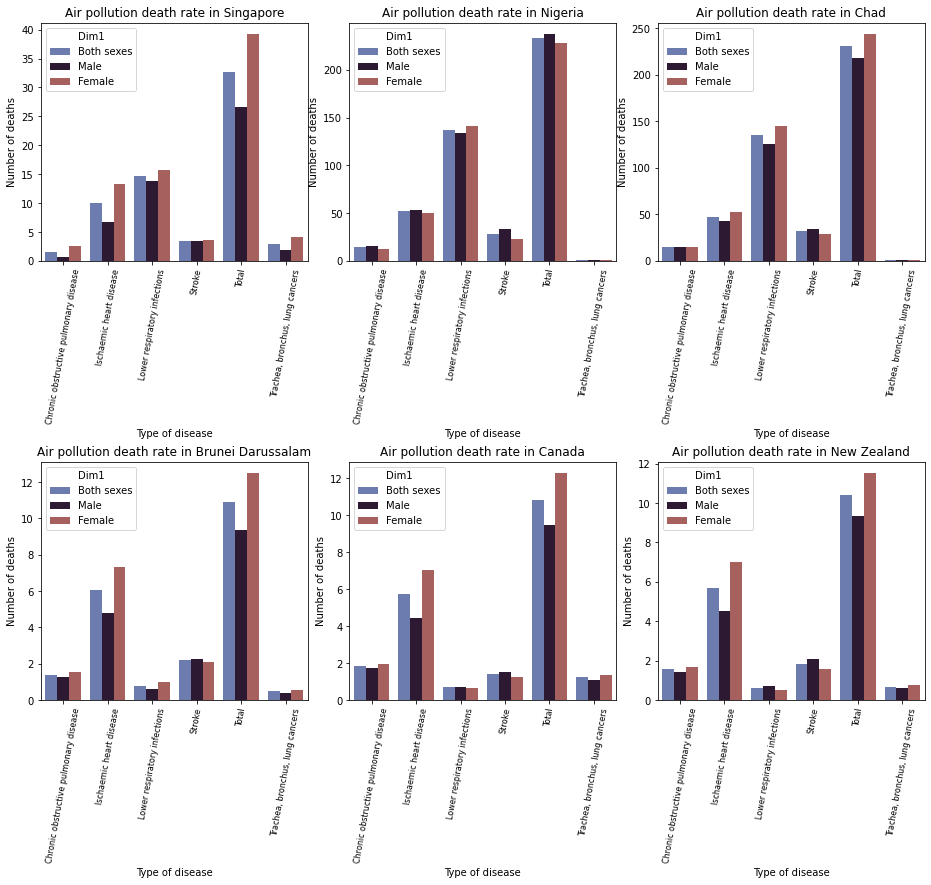

In [34]:
print("Air Pollution Death Rate")

pollution = pd.read_csv('C:\\Users\\user\\Desktop\\dataset\\airPollutionDeathRate.csv')
pollution['First Tooltip'] = [float(i.split(' [')[0]) for i in pollution['First Tooltip']]
indices = pd.Series([i.mean() for i in np.array_split(pollution['First Tooltip'], 
                                                      183)]).sort_values(ascending=False).index
fig, axes = plt.subplots(2, 3, figsize=(13, 10))
fig.tight_layout(h_pad=18)
h, j = 0, 0

for typ in [np.unique(pollution['Location'])[list(indices[:3])],
                  np.unique(pollution['Location'])[list(indices[-3:])]]:
    for country in typ:
        df = pollution[pollution['Location']==country]
        data = pd.DataFrame([], columns=['Dim1', 'Dim2', 'First Tooltip'])

        for i in np.unique(df['Dim2']):
            means = df[df['Dim2']==i].groupby(['Dim1']).mean()
            for t in list(means['First Tooltip']):
                data = data.append({'First Tooltip': t, 'Dim2': i}, ignore_index=True)
        data['Dim1'] = df['Dim1'][:len(data)].reset_index(drop=True)

        sns.barplot(data=data, x='Dim2', y='First Tooltip', hue='Dim1', palette='twilight', ax=axes[h][j])
        axes[h][j].set_title('Air pollution death rate in ' + country)
        axes[h][j].set_xlabel('Type of disease')
        axes[h][j].set_ylabel('Number of deaths')
        axes[h][j].set_xticklabels(np.unique(data['Dim2']), rotation=80, size=8)
        j += 1
    j = 0
    h += 1

plt.show()

In [35]:
print('Voilence Against Women')

Voilence Against Women


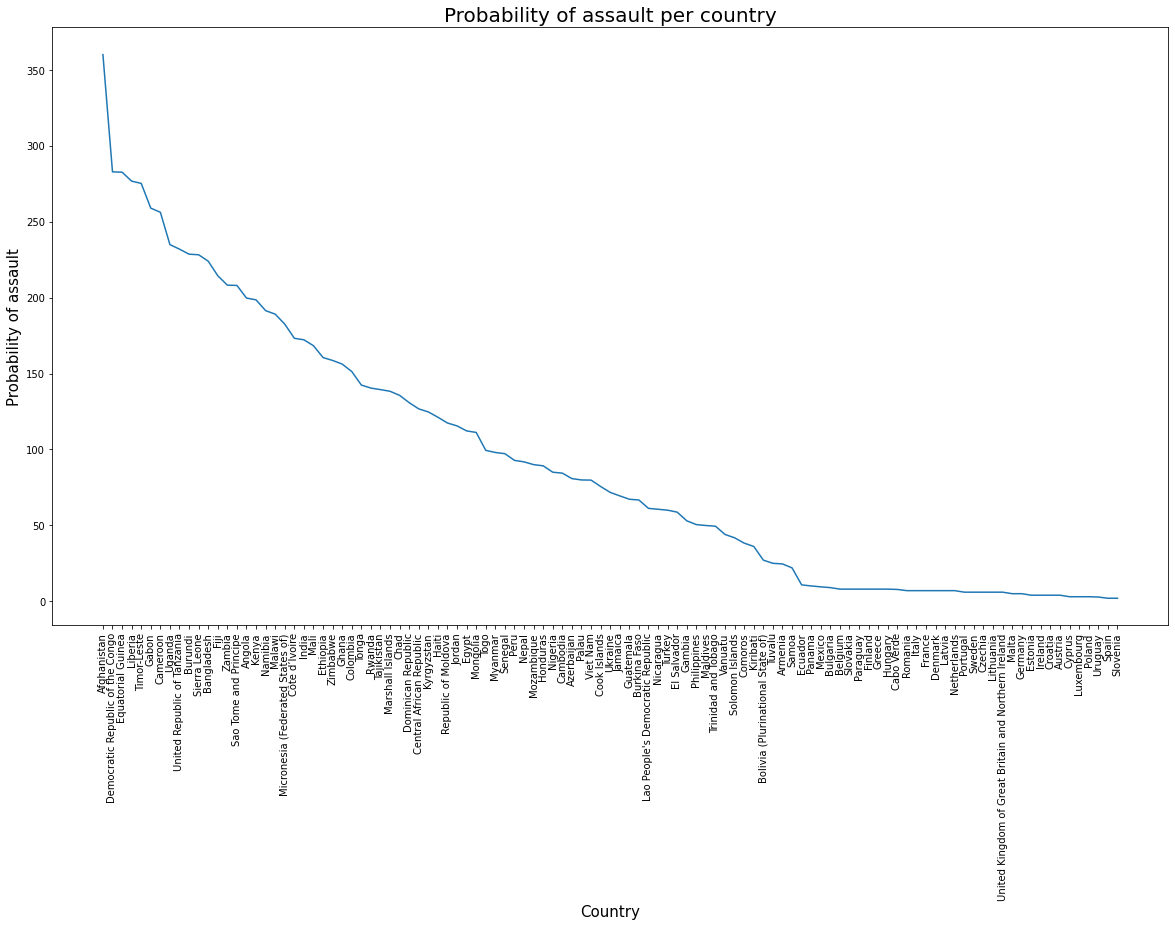

In [36]:
assault = pd.read_csv('C:\\Users\\user\\Desktop\\dataset\\eliminateViolenceAgainstWomen.csv')
df = assault[assault['Location']=='Afghanistan']

assault_sort = pd.DataFrame([])
assault_sort0 = []
assault_sort1 = []
index = []

for i in np.unique(assault['Location']):
    assault_sort0.append(i)
    assault_sort1.append(assault['First Tooltip'][assault['Location']==i].sum())
    index.append(list(assault['Location'][assault['Location']==i].index)[0])
    
assault_sort['Name'] = assault_sort0
assault_sort['Value'] = assault_sort1
assault_sort.index = index
assault_sort = assault_sort.sort_values(by='Value', ascending=False)

fig, ax = plt.subplots(1, 1, figsize=(20, 11))
plt.plot(assault_sort['Name'], assault_sort['Value'])
plt.title('Probability of assault per country', size=20)
plt.xlabel('Country', size=15)
plt.ylabel('Probability of assault', size=15)
plt.xticks(rotation=90, size=10)
plt.show()


Three Most Voilent Countries


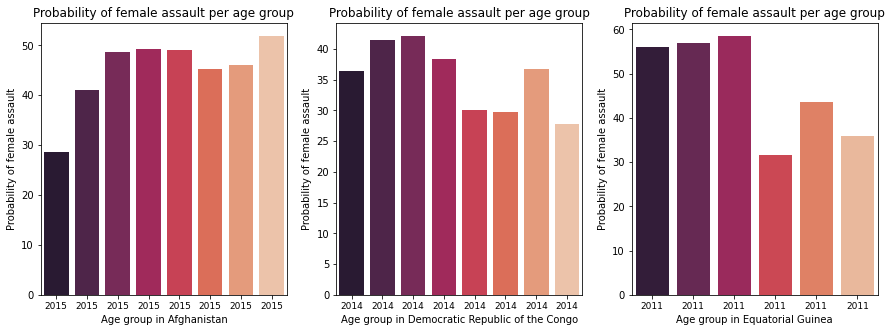

In [38]:
print("Three Most Voilent Countries")

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
countries = list(assault_sort[:3]['Name'])

for country in countries:
    df = assault[assault['Location']==country]
    labels = []
    
    for year in assault['Dim2'][assault['Location']==country]:
        labels.append(year[:5])
    
    sns.barplot(data=df, x='Dim2', y='First Tooltip', palette='rocket', 
                ax=axes[countries.index(country)])
    axes[countries.index(country)].set_title('Probability of female assault per age group')
    axes[countries.index(country)].set_xlabel('Age group in ' + country)
    axes[countries.index(country)].set_ylabel('Probability of female assault')
    axes[countries.index(country)].set_xticklabels(labels=labels, fontsize=9)
plt.show()
